#Estimate of Employee's Burnout Rate

In [8]:
import numpy as np
import pandas as pd
import os
os.chdir('D:\\Users\Dell\Desktop\Data Science\Datasets')

In [9]:
df_train = pd.read_csv('train.csv')
df_train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,NaN,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [10]:
df_test=pd.read_csv('test.csv')
df_test1 = df_test.copy()
df_test

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4
...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7


##Exploratory Data Analysis

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Employee ID           22750 non-null  object 
 1   Date of Joining       22750 non-null  object 
 2   Gender                22750 non-null  object 
 3   Company Type          22750 non-null  object 
 4   WFH Setup Available   22750 non-null  object 
 5   Designation           22750 non-null  float64
 6   Resource Allocation   21369 non-null  float64
 7   Mental Fatigue Score  20633 non-null  float64
 8   Burn Rate             21626 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.6+ MB


In [12]:
df_train.isnull().sum()

Employee ID                0
Date of Joining            0
Gender                     0
Company Type               0
WFH Setup Available        0
Designation                0
Resource Allocation     1381
Mental Fatigue Score    2117
Burn Rate               1124
dtype: int64

In [13]:
df_test.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [14]:
missing = df_train[df_train.isnull().any(axis=1)]
missing

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,NaN,5.8,0.49
8,fffe32003200300034003700,2008-12-27,Female,Service,No,3.0,6.0,NaN,0.56
9,fffe31003600320030003200,2008-03-09,Female,Product,No,3.0,6.0,NaN,0.67
12,fffe32003100300030003700,2008-01-20,Male,Service,Yes,2.0,5.0,NaN,0.40
13,fffe31003800330032003500,2008-02-23,Female,Product,No,1.0,3.0,NaN,0.33
...,...,...,...,...,...,...,...,...,...
22733,fffe31003800370030003000,2008-07-16,Female,Service,No,2.0,3.0,4.5,NaN
22737,fffe3300340033003100,2008-08-17,Female,Service,No,3.0,5.0,NaN,0.43
22741,fffe31003600350034003800,2008-01-07,Male,Product,No,2.0,5.0,6.0,NaN
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,NaN,0.41


In [15]:
df_train.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
count,22750.000000,21369.000000,20633.000000,21626.000000
mean,2.178725,4.481398,5.728188,0.452005
std,1.135145,2.047211,1.920839,0.198226
min,0.000000,1.000000,0.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000
50%,2.000000,4.000000,5.900000,0.450000
75%,3.000000,6.000000,7.100000,0.590000
max,5.000000,10.000000,10.000000,1.000000


In [16]:
df_train=df_train.apply(lambda x: x.fillna(round(x.mean(),0)) if x.dtype=='float' else x.fillna(x.value_counts().index[0]))
df_train

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,6.0,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,6.0,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [17]:
df_train.isna().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [18]:
df_train.nunique()

Employee ID             22750
Date of Joining           366
Gender                      2
Company Type                2
WFH Setup Available         2
Designation                 6
Resource Allocation        10
Mental Fatigue Score      101
Burn Rate                 101
dtype: int64

####Relationship Analysis between Numerical Variables

In [19]:
import seaborn as sns

In [20]:
corelation = df_train.corr()
corelation

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,1.000000,0.850656,0.656017,0.641650
Resource Allocation,0.850656,1.000000,0.737323,0.725483
Mental Fatigue Score,0.656017,0.737323,1.000000,0.783348
Burn Rate,0.641650,0.725483,0.783348,1.000000


<AxesSubplot:>

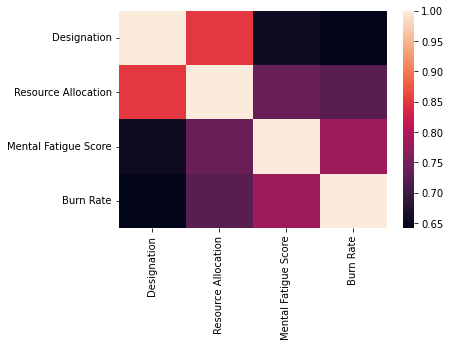

In [21]:
sns.heatmap(corelation)

#### Relationship Analysis between Categorical Variables

<AxesSubplot:xlabel='Gender', ylabel='Burn Rate'>

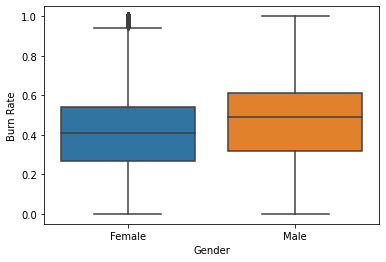

In [22]:
sns.boxplot(y=df_train['Burn Rate'],x=df_train['Gender'])  

In [23]:
df_train.groupby('Gender').mean()          

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Gender,,,,
Female,2.056013,4.189872,5.511782,0.402941
Male,2.313503,4.740269,6.018945,0.459034


In [24]:
df_train.groupby('Company Type').mean()  #

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
Company Type,,,,
Product,2.169256,4.435140,5.747872,0.427209
Service,2.183779,4.461269,5.756475,0.430989


In [25]:
df_train.groupby('WFH Setup Available').mean()           

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
WFH Setup Available,,,,
No,2.461377,5.046080,6.275411,0.492131
Yes,1.938161,3.946705,5.309268,0.376516


#### Relationship Analysis between Numerical Variables using pandas 'groupby' method 

In [26]:
df_train.groupby('Designation').mean()      

,Resource Allocation,Mental Fatigue Score,Burn Rate
Designation,,,
0.0,1.367618,2.967750,0.144200
1.0,2.672813,4.590207,0.292413
2.0,4.167633,5.695559,0.413549
3.0,5.632749,6.560852,0.519303
4.0,7.242158,7.568047,0.653375
5.0,8.864322,8.629899,0.809623


In [27]:
df_train.groupby('Resource Allocation').mean()       

,Designation,Mental Fatigue Score,Burn Rate
Resource Allocation,,,
1.0,0.370184,2.802178,0.130659
2.0,1.036627,4.114795,0.242786
3.0,1.466792,4.924436,0.322845
4.0,2.019340,5.629560,0.401659
5.0,2.451696,6.182077,0.469018
6.0,2.893646,6.829969,0.552127
7.0,3.409669,7.353282,0.626387
8.0,3.845785,7.936398,0.699722
9.0,4.378924,8.550000,0.797377


In [28]:
df_train.groupby('Mental Fatigue Score').mean()

,Designation,Resource Allocation,Burn Rate
Mental Fatigue Score,,,
0.0,0.374269,1.239766,0.001287
0.1,0.470588,1.647059,0.010000
0.2,0.434783,1.391304,0.005217
0.3,0.461538,1.076923,0.017692
0.4,0.421053,1.315789,0.007368
...,...,...,...
9.6,4.156250,8.343750,0.865625
9.7,3.975000,8.250000,0.812500
9.8,4.146341,8.463415,0.871463


##Applying ML Linear Regression Algo

In [29]:
dummies=pd.get_dummies(df_train[['Gender','WFH Setup Available']])
dummies

,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes
0,1,0,1,0
1,0,1,0,1
2,1,0,0,1
3,0,1,0,1
4,1,0,1,0
...,...,...,...,...
22745,1,0,1,0
22746,1,0,0,1
22747,0,1,0,1
22748,1,0,1,0


In [30]:
df_train=pd.concat([df_train,dummies],1)
df_train

C:\Users\Dell\AppData\Local\Temp/ipykernel_4980/3348672844.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_train=pd.concat([df_train,dummies],1)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16,1,0,1,0
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36,0,1,0,1
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49,1,0,0,1
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20,0,1,0,1
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,6.0,0.41,1,0,1,0
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59,1,0,0,1
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,6.0,0.72,0,1,0,1
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52,1,0,1,0


In [31]:
dummies1=pd.get_dummies(df_test[['Gender','WFH Setup Available']])
dummies1

,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes
0,1,0,1,0
1,1,0,0,1
2,0,1,0,1
3,1,0,1,0
4,1,0,1,0
...,...,...,...,...
12245,1,0,0,1
12246,1,0,0,1
12247,0,1,1,0
12248,0,1,1,0


In [32]:
df_test=pd.concat([df_test,dummies1],1)
df_test

C:\Users\Dell\AppData\Local\Temp/ipykernel_4980/547382913.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  df_test=pd.concat([df_test,dummies1],1)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7,1,0,1,0
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,1,0,0,1
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,0,1,0,1
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6,1,0,1,0
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1,1,0,0,1
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9,1,0,0,1
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6,0,1,1,0
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7,0,1,1,0


In [33]:
df_train.columns

Index(['Employee ID', 'Date of Joining', 'Gender', 'Company Type',
       'WFH Setup Available', 'Designation', 'Resource Allocation',
       'Mental Fatigue Score', 'Burn Rate', 'Gender_Female', 'Gender_Male',
       'WFH Setup Available_No', 'WFH Setup Available_Yes'],
      dtype='object')

In [34]:
x_train = df_train.drop(['Employee ID', 'Date of Joining', 'Gender', 'Company Type','WFH Setup Available','Burn Rate'],axis=1)
x_train

,Designation,Resource Allocation,Mental Fatigue Score,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes
0,2.0,3.0,3.8,1,0,1,0
1,1.0,2.0,5.0,0,1,0,1
2,2.0,4.0,5.8,1,0,0,1
3,1.0,1.0,2.6,0,1,0,1
4,3.0,7.0,6.9,1,0,1,0
...,...,...,...,...,...,...,...
22745,1.0,3.0,6.0,1,0,1,0
22746,3.0,6.0,6.7,1,0,0,1
22747,3.0,7.0,6.0,0,1,0,1
22748,2.0,5.0,5.9,1,0,1,0


In [35]:
x_test = df_test.drop(['Employee ID', 'Date of Joining', 'Gender', 'Company Type','WFH Setup Available'],axis=1)
x_test

,Designation,Resource Allocation,Mental Fatigue Score,Gender_Female,Gender_Male,WFH Setup Available_No,WFH Setup Available_Yes
0,2.0,5.0,7.7,1,0,1,0
1,1.0,2.0,5.2,1,0,0,1
2,1.0,3.0,5.9,0,1,0,1
3,3.0,6.0,4.6,1,0,1,0
4,2.0,5.0,6.4,1,0,1,0
...,...,...,...,...,...,...,...
12245,1.0,2.0,6.1,1,0,0,1
12246,2.0,4.0,5.9,1,0,0,1
12247,4.0,7.0,9.6,0,1,1,0
12248,3.0,6.0,6.7,0,1,1,0


In [36]:
y_train = df_train['Burn Rate']
y_train

0        0.16
1        0.36
2        0.49
3        0.20
4        0.52
         ... 
22745    0.41
22746    0.59
22747    0.72
22748    0.52
22749    0.61
Name: Burn Rate, Length: 22750, dtype: float64

In [37]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [38]:
model.fit(x_train,y_train)

LinearRegression()

In [39]:
y_output = {'Burn Rate' : model.predict(x_test)}
y_test = pd.DataFrame(data=y_output)
y_test

,Burn Rate
0,0.576328
1,0.300415
2,0.380163
3,0.417402
4,0.493744
...,...
12245,0.357588
12246,0.414498
12247,0.776708
12248,0.554477


In [40]:
predicted = pd.concat([df_test1,y_test],1)
predicted

C:\Users\Dell\AppData\Local\Temp/ipykernel_4980/1300340091.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  predicted = pd.concat([df_test1,y_test],1)


,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7,0.576328
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2,0.300415
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9,0.380163
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6,0.417402
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4,0.493744
...,...,...,...,...,...,...,...,...,...
12245,fffe3900310034003700,2008-10-02,Female,Service,Yes,1.0,2.0,6.1,0.357588
12246,fffe32003600330034003000,2008-03-31,Female,Product,Yes,2.0,4.0,5.9,0.414498
12247,fffe31003800340039003000,2008-02-12,Male,Service,No,4.0,7.0,9.6,0.776708
12248,fffe32003600380031003800,2008-02-06,Male,Service,No,3.0,6.0,6.7,0.554477
